## Import Libraries

In [370]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## Data Preparation

In [371]:
df1 = pd.read_csv("../data/2015.csv")
df2 = pd.read_csv("../data/2016.csv")
df3 = pd.read_csv("../data/2017.csv")
df4 = pd.read_csv("../data/2018.csv")
df5 = pd.read_csv("../data/2019.csv")

In [372]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [373]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [374]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [375]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [376]:
df4['Country or region'].head()

0        Finland
1         Norway
2        Denmark
3        Iceland
4    Switzerland
Name: Country or region, dtype: object

In [377]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [378]:
df5['Country or region'].head()

0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
Name: Country or region, dtype: object

In [379]:
df1['Year'] = "2015"
df2['Year'] = "2016"
df3['Year'] = "2017"
df4['Year'] = "2018"
df5['Year'] = "2019"

df1.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',
    'Health (Life Expectancy)': 'Health_Life_Expectancy',
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
}, inplace=True)

df2.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Lower Confidence Interval': 'Lower_Confidence_Interval',
    'Upper Confidence Interval': 'Upper_Confidence_Interval',
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',
    'Health (Life Expectancy)': 'Health_Life_Expectancy',
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
}, inplace=True)

df3.rename(columns={
    'Happiness.Rank': 'Happiness_Rank',
    'Happiness.Score': 'Happiness_Score',
    'Whisker.high': 'Upper_Confidence_Interval',
    'Whisker.low': 'Lower_Confidence_Interval',
    'Economy..GDP.per.Capita.': 'Economy_GDP_per_Capita',
    'Health..Life.Expectancy.': 'Health_Life_Expectancy',
    'Trust..Government.Corruption.': 'Trust_Government_Corruption',
    'Dystopia.Residual': 'Dystopia_Residual'
}, inplace=True)

df4.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Happiness_Score',
    'GDP per capita': 'Economy_GDP_per_Capita',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health_Life_Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust_Government_Corruption'
}, inplace=True)

df5.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region': 'Country',
    'Score': 'Happiness_Score',
    'GDP per capita': 'Economy_GDP_per_Capita',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health_Life_Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust_Government_Corruption'
}, inplace=True)

dfs = [df1, df2, df3, df4, df5]
data = pd.concat(dfs, ignore_index=True)


In [380]:
columns_to_drop = ['Standard Error', 'Dystopia_Residual', 'Lower_Confidence_Interval', 'Upper_Confidence_Interval']

data = data.drop(columns=columns_to_drop)
data.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## EDA

In [381]:
null_percentage = data.isnull().mean() * 100
print(null_percentage)

Country                         0.000000
Region                         59.718670
Happiness_Rank                  0.000000
Happiness_Score                 0.000000
Economy_GDP_per_Capita          0.000000
Family                          0.000000
Health_Life_Expectancy          0.000000
Freedom                         0.000000
Trust_Government_Corruption     0.127877
Generosity                      0.000000
Year                            0.000000
dtype: float64


### NAs Handling

In [382]:
unique_countries = data['Country'].unique()
print(unique_countries)

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Philip

In [383]:
selected_columns = data[['Country', 'Region']]
selected_columns.head(1000)

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
777,Rwanda,NaN
778,Tanzania,NaN
779,Afghanistan,NaN
780,Central African Republic,NaN


In [384]:
region_countries = {
    # North Aerica
    'North America': ['Canada', 'United States'],
    
    # Australia
    'Australia and New Zealand': ['New Zealand', 'Australia'],
    
    # South America
    'Latin America and Caribbean': ['Costa Rica', 'Mexico', 'Brazil', 'Panama', 'Chile', 'Argentina', 'Uruguay', 
        'Colombia', 'Trinidad and Tobago', 'Trinidad & Tobago', 'El Salvador', 'Guatemala', 'Suriname', 'Jamaica', 'Dominican Republic', 
        'Nicaragua', 'Ecuador', 'Bolivia', 'Peru', 'Paraguay', 'Venezuela', 'Honduras', 'Haiti', 'Guatemala', 'Belize', 
        'Cuba', 'Puerto Rico'],
    
    #Europe
    'Europe' : ['Northern Cyprus', 'North Macedonia', 'North Cyprus'],
    'Central and Eastern Europe': ['Czech Republic', 'Slovakia', 'Poland', 'Hungary', 'Slovenia', 'Croatia', 'Bosnia and Herzegovina', 
        'Estonia', 'Lithuania', 'Latvia', 'Romania', 'Bulgaria', 'Serbia', 'Montenegro', 'Macedonia', 'Albania', 'Kosovo', 'Ukraine', 
        'Belarus', 'Moldova', 'Russia'],
    'Western Europe': ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland', 'Netherlands', 'Sweden', 
    'Luxembourg', 'Ireland', 'Belgium', 'United Kingdom', 'Austria', 'Germany', 'France', 'Malta', 'Spain', 
    'Italy', 'Cyprus', 'Portugal', 'Greece'],
    
    # Asia
    'Central Asia' : ['Uzbekistan', 'Kazakhstan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan'],
    'South Asia' : ['Bhutan', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka'],
    'Eastern Asia': ['Taiwan', 'Japan', 'South Korea', 'Hong Kong', 'Mongolia', 'China'],
    'Southeastern Asia': ['Singapore', 'Thailand', 'Vietnam', 'Malaysia', 'Indonesia', 'Philippines', 'Laos', 'Myanmar', 'Cambodia'],
    'Caucasus and Central Asia': ['Azerbaijan', 'Georgia'],
    'East Asia': ['Taiwan Province of China', 'Hong Kong S.A.R., China'],
    
    # Africa
    'Western Africa' : ['Ghana', 'Ivory Coast', 'Guinea'],
    'Eastern Africa' : ['Djibouti', 'Comoros'],
    'Sub-Saharan Africa': ['Mauritius', 'Nigeria', 'Somaliland region', 'Kenya', 'Zambia', 'Zimbabwe', 'Liberia', 'Namibia', 'Somalia', 'South Africa', 
        'Niger', 'Congo (Kinshasa)', 'Uganda', 'Mozambique', 'Senegal', 'Gabon', 'Tanzania', 
        'Madagascar', 'Central African Republic', 'Chad', 'Ethiopia', 'Mauritania', 'Malawi', 
        'Sierra Leone', 'Congo (Brazzaville)', 'Armenia', 'Botswana', 'Mali', 'Angola', 'Benin', 
        'Mauritania', 'Burkina Faso', 'Rwanda', 'Togo', 'Burundi', 'South Sudan', 'Gambia'],
    'Northern Africa and Middle East' : ['Egypt', 'Sudan'],
    'East Africa' : ['Somaliland Region'],
    'Middle East and Northern Africa': ['Israel', 'Cameroon', 'United Arab Emirates', 'Oman', 'Saudi Arabia', 'Kuwait', 'Bahrain', 'Qatar', 
        'Libya', 'Jordan', 'Lebanon', 'Tunisia', 'Turkey', 'Algeria', 'Morocco', 'Iran', 'Iraq', 
        'Palestinian Territories', 'Yemen', 'Syria', 'Afghanistan'],
    'Southern Africa' : ['Lesotho','Swaziland']
}
country_region_mapping = {country: region for region, countries in region_countries.items() for country in countries}

data['Region'] = data['Country'].map(country_region_mapping)
print(data.isnull().sum())

Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    1
Generosity                     0
Year                           0
dtype: int64


In [385]:
filtered_data = data[data['Country'] == 'United States']

print(filtered_data)

           Country         Region  Happiness_Rank  Happiness_Score  \
14   United States  North America              15            7.119   
170  United States  North America              13            7.104   
328  United States  North America              14            6.993   
487  United States  North America              18            6.886   
644  United States  North America              19            6.892   

     Economy_GDP_per_Capita    Family  Health_Life_Expectancy   Freedom  \
14                 1.394510  1.247110                0.861790  0.546040   
170                1.507960  1.047820                0.779000  0.481630   
328                1.546259  1.419921                0.774287  0.505741   
487                1.398000  1.471000                0.819000  0.547000   
644                1.433000  1.457000                0.874000  0.454000   

     Trust_Government_Corruption  Generosity  Year  
14                      0.158900    0.401050  2015  
170                   

### Graphs

Numeric Variables Distibution

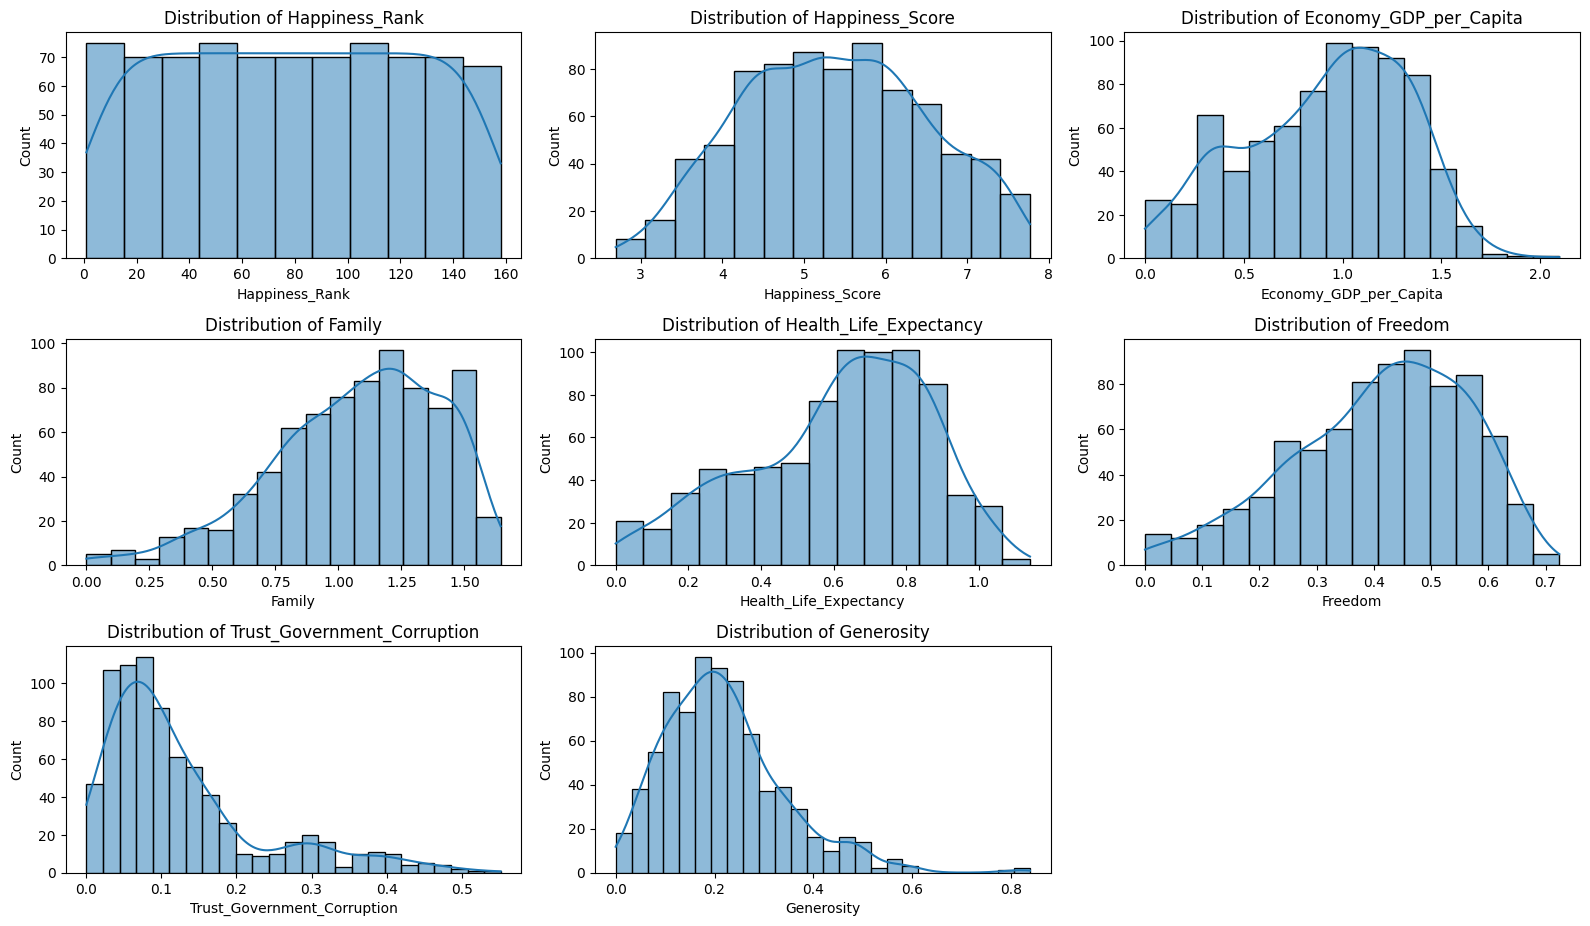

In [386]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


Categorical Variables Distributions

C:\Users\juanj\AppData\Local\Temp\ipykernel_14184\2257750332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')
C:\Users\juanj\AppData\Local\Temp\ipykernel_14184\2257750332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')


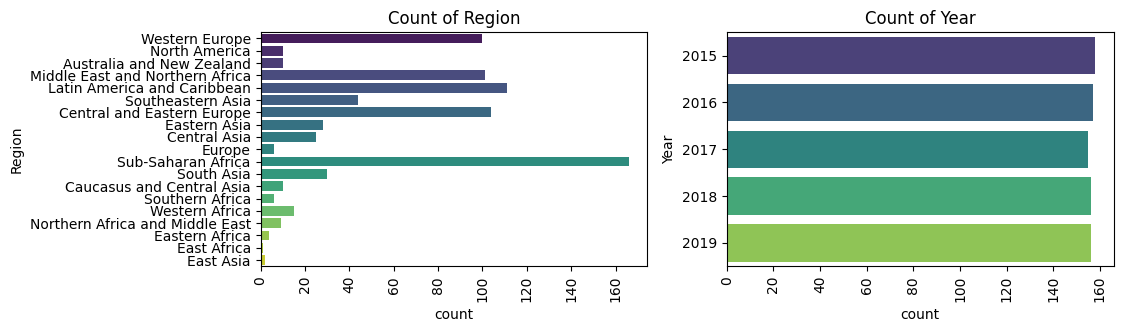

In [387]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'Country']

plt.figure(figsize=(16, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data[column], palette='viridis')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Scatterplot to Hapiness Score

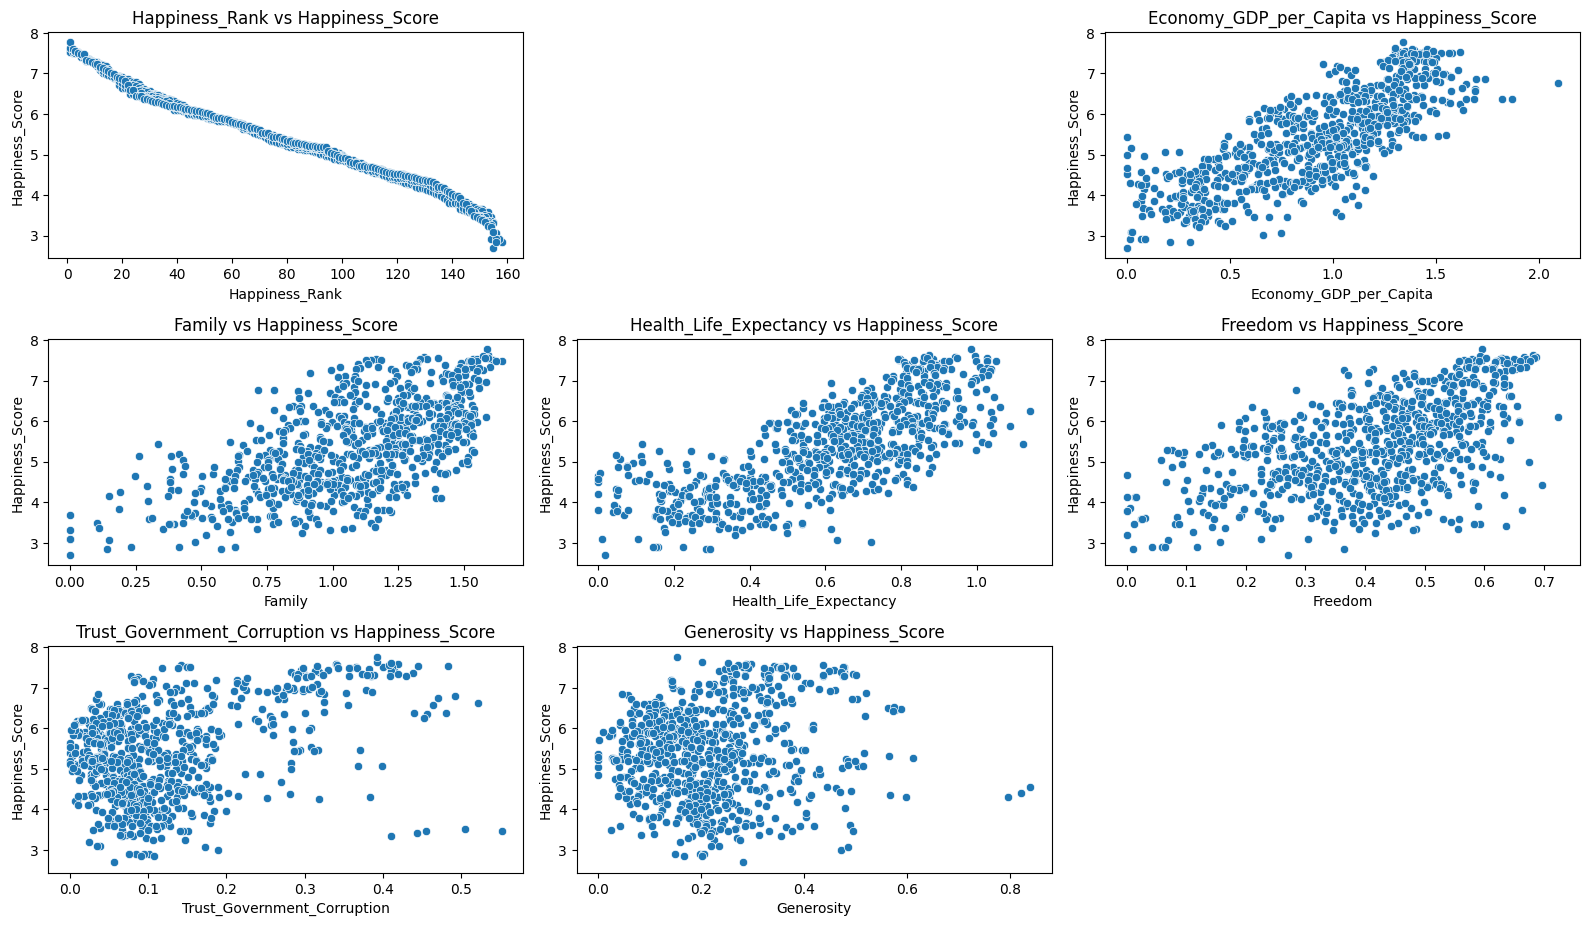

In [388]:
target = 'Happiness_Score'

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    if column != target:
        plt.subplot(4, 3, i)
        sns.scatterplot(x=data[column], y=data[target])
        plt.title(f'{column} vs {target}')
plt.tight_layout()
plt.show()


Boxplots of Categorical Variables

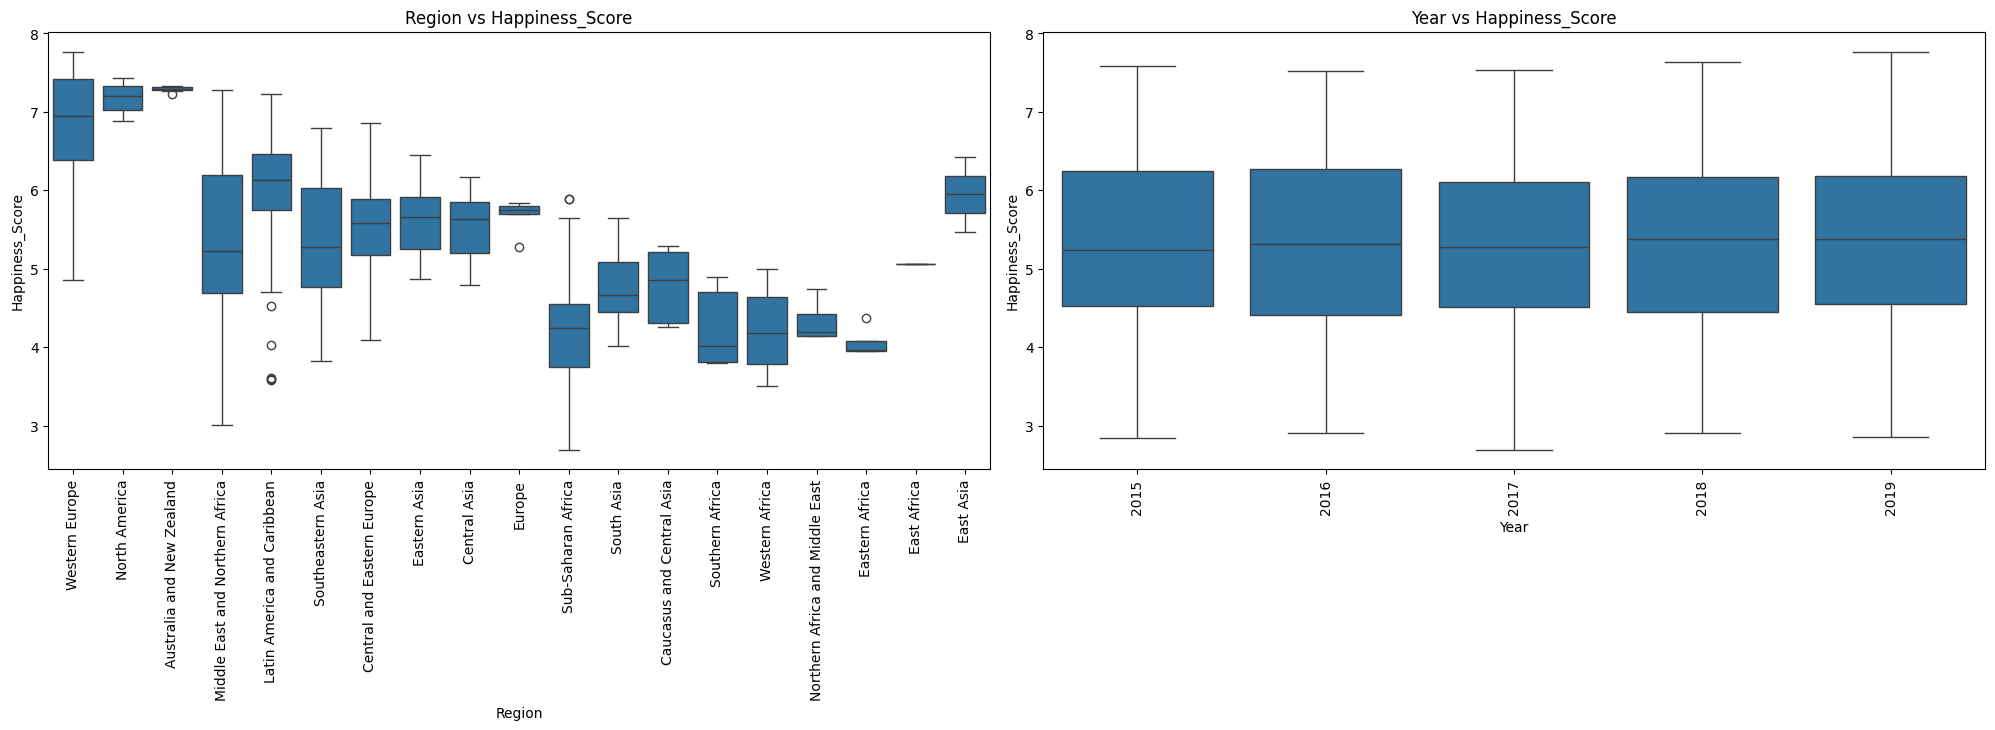

In [389]:
plt.figure(figsize=(30, 26))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[column], y=data[target])
    plt.title(f'{column} vs {target}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Boxplot of Numeric Variables

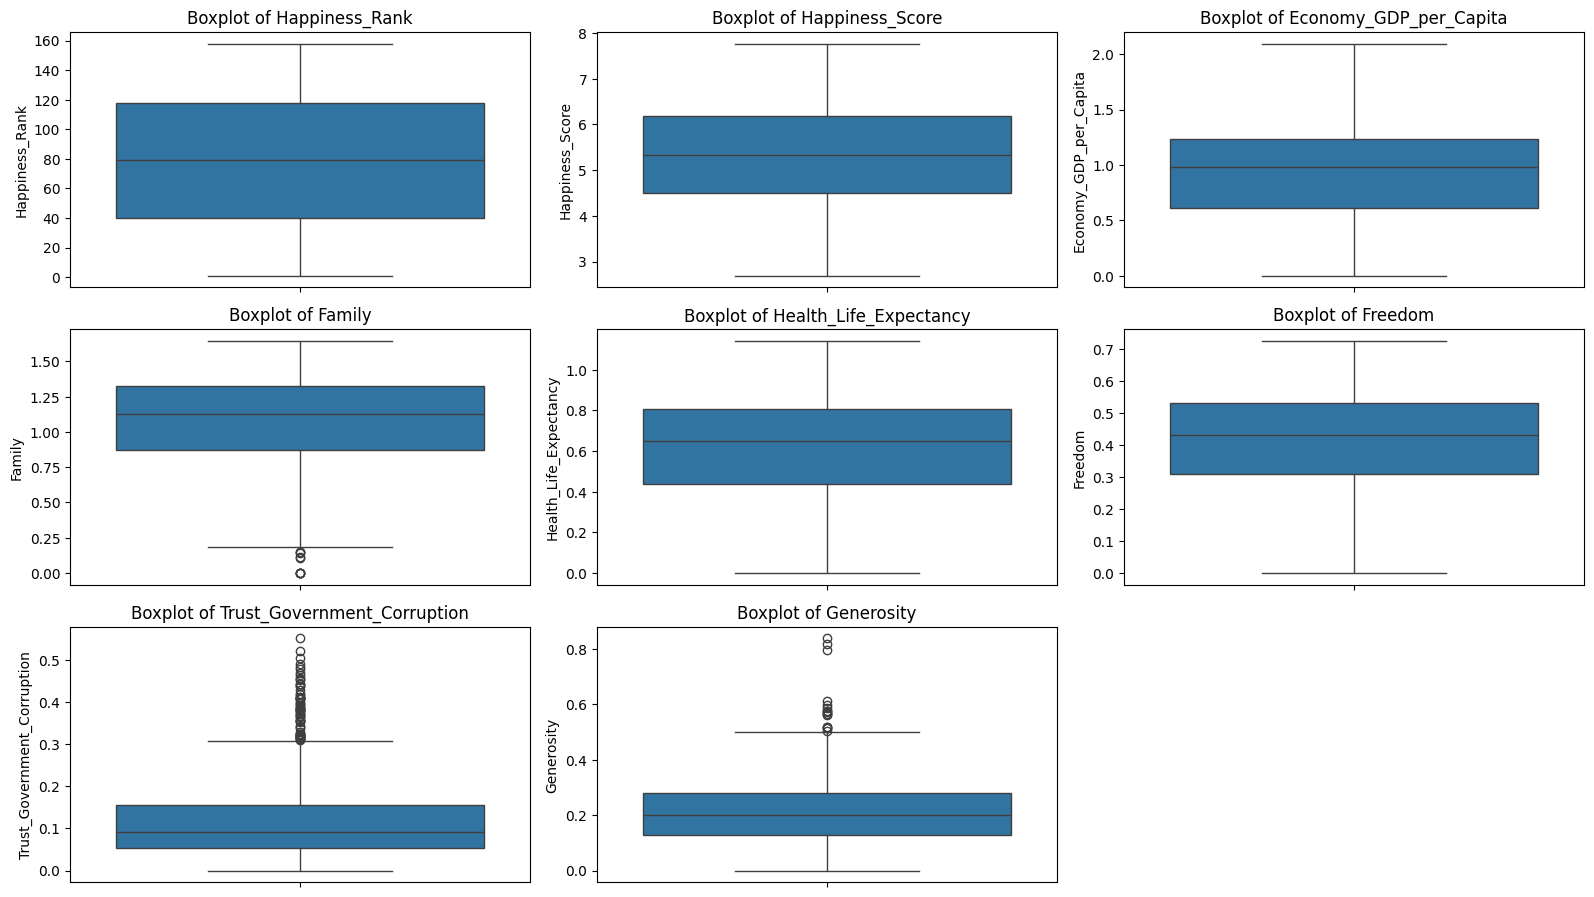

In [390]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


Correlation Matrix

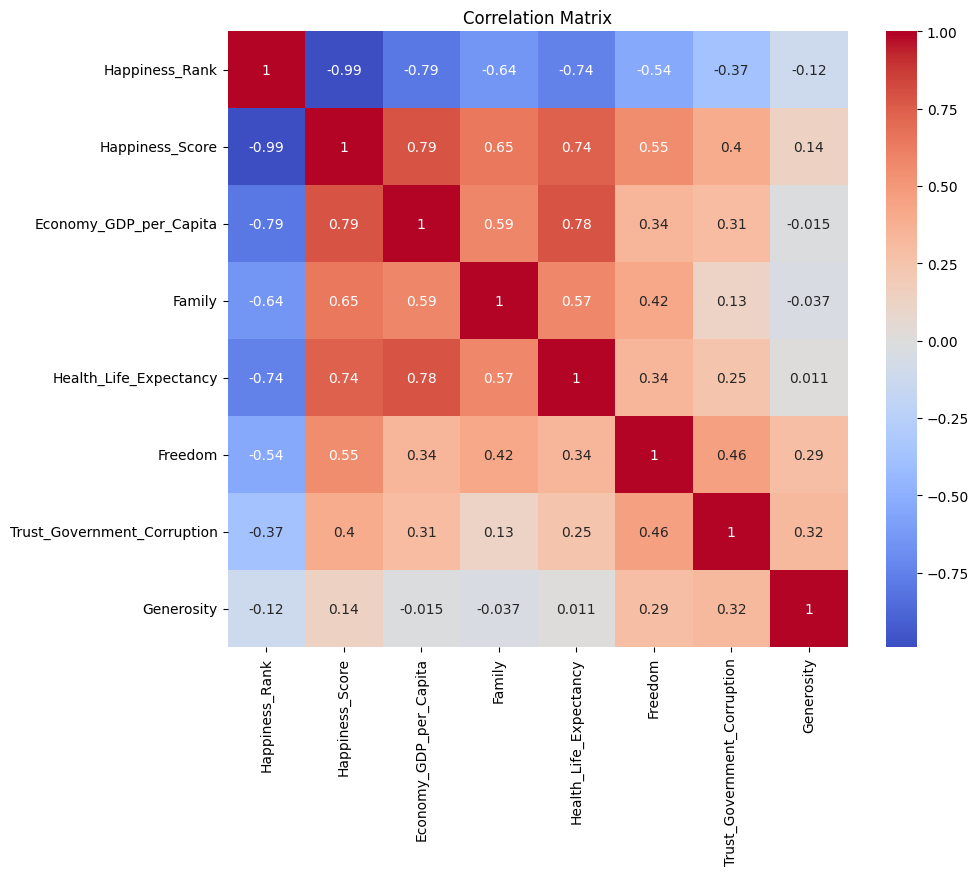

In [391]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

 Geographic Distrubutions

C:\Users\juanj\AppData\Local\Temp\ipykernel_14184\431417894.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 2000x1000 with 0 Axes>

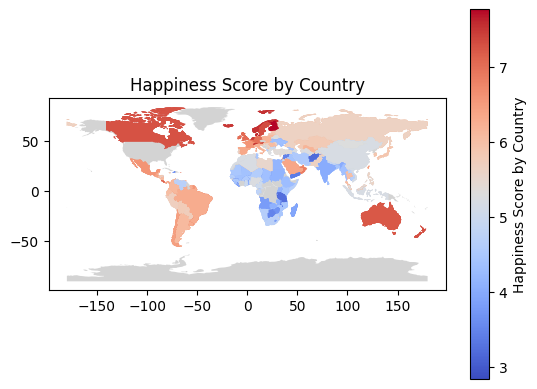

In [392]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data_geo = pd.merge(world, data, how="left", left_on="name", right_on="Country")

plt.figure(figsize=(20, 10))
data_geo.plot(column='Happiness_Score', cmap='coolwarm', legend=True,
              legend_kwds={'label': "Happiness Score by Country"},
              missing_kwds={"color": "lightgrey"})
plt.title('Happiness Score by Country')
plt.show()


In [393]:
world['name'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

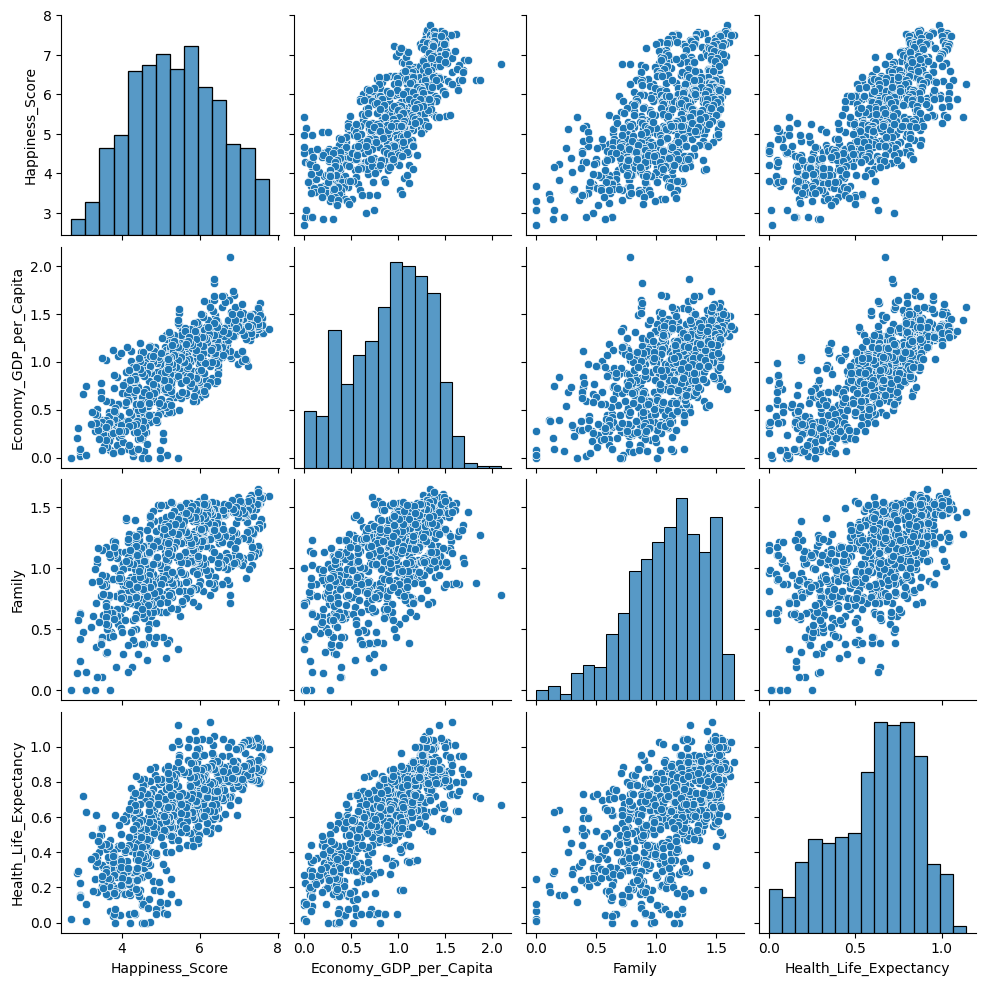

In [394]:
subset_columns_1 = ['Happiness_Score', 'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy']
sns.pairplot(data[subset_columns_1])
plt.show()


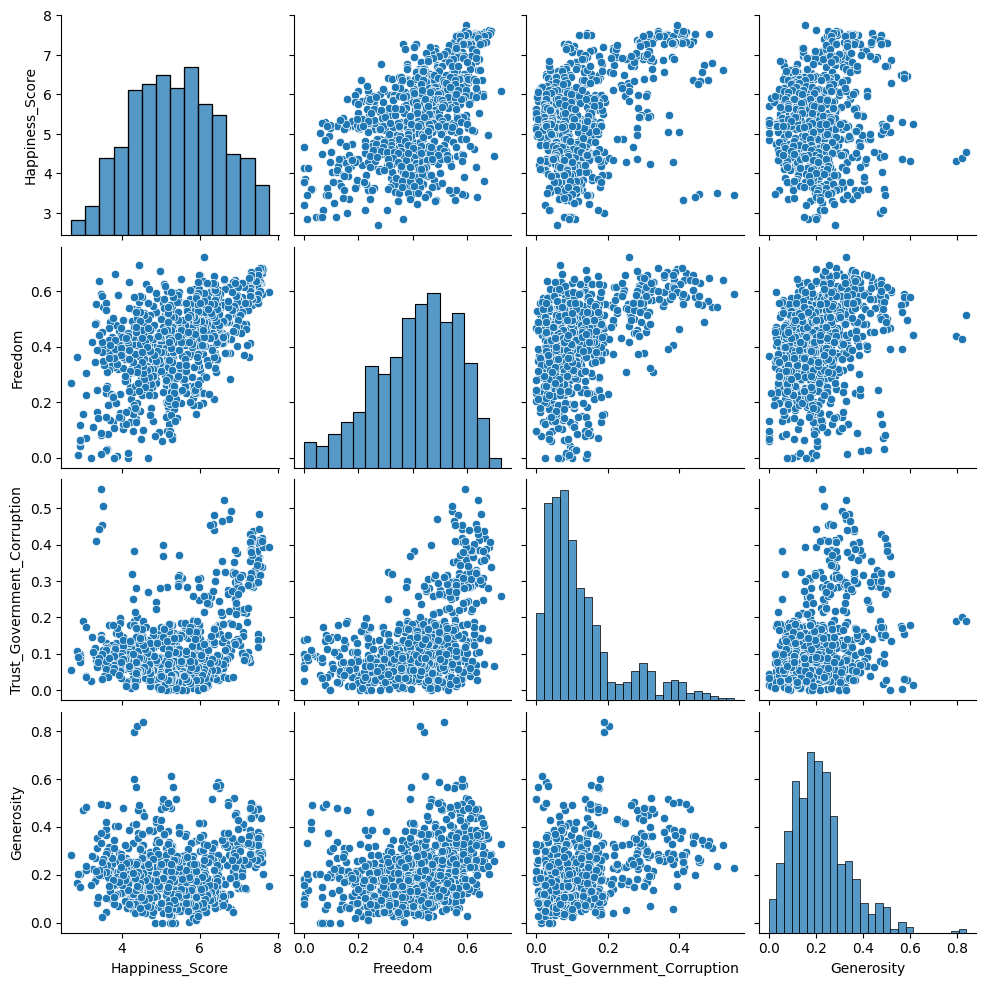

In [395]:
subset_columns_2 = ['Happiness_Score', 'Freedom', 'Trust_Government_Corruption', 'Generosity']
sns.pairplot(data[subset_columns_2])
plt.show()


## Training Models

In [396]:
model_data = data.copy()
model_data = model_data.dropna()

In [397]:
columns_to_use = ['Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 
                  'Freedom', 'Trust_Government_Corruption', 'Generosity', 'Year']

X = model_data[columns_to_use]
y = model_data['Happiness_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [398]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred_linear_regression = linear_regression_model.predict(X_test)

r2_linear_regression = r2_score(y_test, y_pred_linear_regression)
mae_linear_regression = mean_absolute_error(y_test, y_pred_linear_regression)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)

print("Metrics of the linear regression model:")
print(f"R^2: {r2_linear_regression}")
print(f"MAE: {mae_linear_regression}")
print(f"MSE: {mse_linear_regression}")

Metrics of the linear regression model:
R^2: 0.7632021824967564
MAE: 0.4201016400225442
MSE: 0.29568735162348186


In [399]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

r2_random_forest = r2_score(y_test, y_pred_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

print("Metrics of Random Forest model:")
print(f"R^2: {r2_random_forest}")
print(f"MAE: {mae_random_forest}")
print(f"MSE: {mse_random_forest}")

Metrics of Random Forest model:
R^2: 0.813232204569144
MAE: 0.37676280880903956
MSE: 0.23321530317208095


## Conclusion

Metrics of Random Forest model:

R^2: 0.8149170806702517

MAE: 0.3747371048920463

MSE: 0.2311114132063577

Based on the obtained metrics, the Random Forest model outperforms the others in terms of R^2, MAE, and MSE. With an R^2 value of 0.8149 and lower MAE and MSE values compared to the Linear Regression model, the Random Forest model demonstrates superior predictive performance.